In [ ]:
                                               Handling imbalanced data in customer churn prediction
Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. 
We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model. We will then handle 
imbalance in data using various techniques and improve f1-score

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
298   2985-JUUBZ    Male              0     Yes        Yes      40   
6728  2380-DAMQP  Female              0     Yes         No      72   
5160  9840-EFJQB  Female              0      No         No       1   
1963  7967-HYCDE    Male              0      No         No       8   
383   5167-ZFFMM    Male              0      No         No       1   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
298           Yes           Yes             DSL             No  ...   
6728          Yes           Yes     Fiber optic            Yes  ...   
5160          Yes            No     Fiber optic             No  ...   
1963          Yes            No     Fiber optic             No  ...   
383           Yes           Yes     Fiber optic             No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
298               Yes          No         Yes             Yes  Month-to-month   
6728              Yes         Yes         Yes             Yes        Two year   
5160               No          No          No              No  Month-to-month   
1963               No          No          No              No  Month-to-month   
383                No          No          No             Yes  Month-to-month   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
298               Yes           Electronic check          74.55       3015.75   
6728               No           Electronic check         115.15        8349.7   
5160               No           Electronic check          74.35         74.35   
1963               No  Bank transfer (automatic)          70.70         553.4   
383               Yes    Credit card (automatic)          90.85         90.85   

     Churn  
298     No  
6728    No  
5160    No  
1963    No  
383    Yes  

[5 rows x 21 columns]

In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
517400/df.shape[0]

73.46301292063042

In [7]:
# First of all, drop customerID column as it is of no use

In [8]:
df.drop('customerID',axis='columns',inplace=True)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#  Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [13]:
df.shape

(7043, 20)

In [14]:
df.iloc[488].TotalCharges

' '

In [15]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [16]:
# Remove rows with space in TotalCharges

In [17]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [18]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [20]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [21]:
df1[df1.Churn=='No']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
3       Male              0      No         No      45           No   
6       Male              0      No        Yes      22          Yes   
7     Female              0      No         No      10           No   
...      ...            ...     ...        ...     ...          ...   
7037  Female              0      No         No      72          Yes   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService       OnlineSecurity  \
0     No phone service             DSL                   No   
1                   No             DSL                  Yes   
3     No phone service             DSL                  Yes   
6                  Yes     Fiber optic                   No   
7     No phone service             DSL                  Yes   
...                ...             ...                  ...   
7037                No              No  No internet service   
7038               Yes             DSL                  Yes   
7039               Yes     Fiber optic                   No   
7040  No phone service             DSL                  Yes   
7042                No     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
0                     Yes                   No                   No   
1                      No                  Yes                   No   
3                      No                  Yes                  Yes   
6                     Yes                   No                   No   
7                      No                   No                   No   
...                   ...                  ...                  ...   
7037  No internet service  No internet service  No internet service   
7038                   No                  Yes                  Yes   
7039                  Yes                  Yes                   No   
7040                   No                   No                   No   
7042                   No                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
0                      No                   No  Month-to-month   
1                      No                   No        One year   
3                      No                   No        One year   
6                     Yes                   No  Month-to-month   
7                      No                   No  Month-to-month   
...                   ...                  ...             ...   
7037  No internet service  No internet service        Two year   
7038                  Yes                  Yes        One year   
7039                  Yes                  Yes        One year   
7040                   No                   No  Month-to-month   
7042                  Yes                  Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
3                  No  Bank transfer (automatic)           42.30   
6                 Yes    Credit card (automatic)           89.10   
7                  No               Mailed check           29.75   
...               ...                        ...             ...   
7037              Yes  Bank transfer (automatic)           21.15   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
70

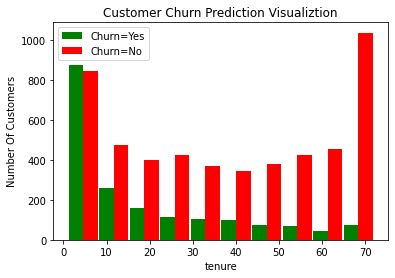

In [22]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

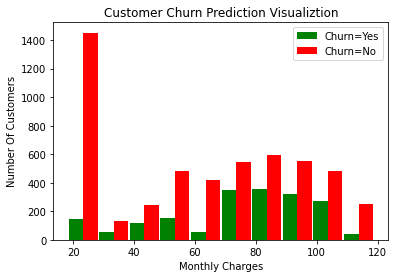

In [23]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [24]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [25]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [26]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [27]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [28]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [29]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [30]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [31]:
df1.gender.unique()

array([1, 0])

In [32]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df2.sample(5)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
5361       1              0        0           1       4             1   
167        0              0        1           0      72             1   
2550       1              0        1           1      56             1   
7023       1              1        1           0      63             1   
1499       0              1        1           0      64             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
5361              0               0             0                 0  ...   
167               1               1             1                 1  ...   
2550              0               0             0                 0  ...   
7023              1               0             1                 1  ...   
1499              1               0             1                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
5361                    0                            0                   1   
167                     1                            0                   0   
2550                    0                            0                   1   
7023                    0                            1                   0   
1499                    0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
5361                        0                  1                  0   
167                         0                  0                  1   
2550                        0                  0                  1   
7023                        1                  0                  0   
1499                        1                  0                  0   

      PaymentMethod_Bank transfer (automatic)  \
5361                                        0   
167                                         1   
2550                                        0   
7023                                        0   
1499                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
5361                                      0                               0   
167                                       0                               0   
2550                                      0                               0   
7023                                      0                               1   
1499                                      0                               1   

      PaymentMethod_Mailed check  
5361                           1  
167                            0  
2550                           1  
7023                           0  
1499                           0  

[5 rows x 27 columns]

In [34]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [35]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [36]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [37]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [38]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [39]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [40]:
5163/1869

2.7624398073836276

In [41]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [42]:
X_train.shape

(5625, 26)

In [43]:
X_test.shape

(1407, 26)

In [44]:
X_train[:10]

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
684        1              0        0           0  0.000000             1   
2446       1              0        0           0  0.239437             1   
1680       0              0        1           1  0.774648             1   
2220       0              0        1           0  1.000000             1   
2842       1              0        0           0  0.042254             0   
5131       1              0        1           0  0.605634             1   
4372       0              0        1           1  0.000000             1   
4687       0              0        1           0  0.295775             1   
2385       1              0        0           1  0.028169             0   
6773       0              1        1           0  0.507042             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
684               0               0             0                 0  ...   
2446              1               0             1                 0  ...   
1680              1               0             0                 0  ...   
2220              0               1             1                 0  ...   
2842              0               1             0                 1  ...   
5131              1               0             0                 0  ...   
4372              0               0             0                 0  ...   
4687              0               0             0                 1  ...   
2385              0               0             1                 0  ...   
6773              1               0             0                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
684                     0                            1                   0   
2446                    0                            1                   0   
1680                    0                            0                   1   
2220                    1                            0                   0   
2842                    1                            0                   0   
5131                    0                            1                   0   
4372                    0                            0                   1   
4687                    0                            1                   0   
2385                    1                            0                   0   
6773                    0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
684                         1                  0                  0   
2446                        1                  0                  0   
1680                        0                  1                  0   
2220                        0                  0                  1   
2842                        1                  0                  0   
5131                        1                  0                  0   
4372                        1                  0                  0   
4687                        1                  0                  0   
2385                        1                  0                  0   
6773                        1                  0                  0   

      PaymentMethod_Bank transfer (automatic)  \
684                                         0   
2446                                        0   
1680                                        0   
2220                                        1   
2842                                        0   
5131                                        0   
4372                                        1   
4687                                        0   
2385                                        0   
6773                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
684                                       0                             

In [45]:
len(X_train.columns)

26

In [46]:
# Build a model (ANN) in tensorflow/keras

In [47]:
pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 6.9 MB/s 


In [48]:
from tensorflow_addons import losses

In [49]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [50]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [51]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.7700
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.7909
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8000
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8062
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8037
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4079 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4054 - accuracy: 0.8066
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4045 - accura

In [ ]:
#   Mitigating Skewdness of Data
#   Method 1: Undersampling

In [52]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [53]:
df_class_0.shape

(5163, 27)

In [54]:
df_class_1.shape

(1869, 27)

In [55]:
df_class_0.sample(2)

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
6114       0              0        0           0  0.098592             1   
5443       0              0        0           0  0.352113             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
6114              0               0             1                 0  ...   
5443              0               0             0                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
6114                    1                            0                   0   
5443                    1                            0                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
6114                        1                  0                  0   
5443                        1                  0                  0   

      PaymentMethod_Bank transfer (automatic)  \
6114                                        0   
5443                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
6114                                      0                               1   
5443                                      0                               1   

      PaymentMethod_Mailed check  
6114                           0  
5443                           0  

[2 rows x 27 columns]

In [56]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [57]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape

(3738, 27)

In [58]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [59]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [60]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [ ]:
# Printing Classification in the last, Scroll down till the last epoch to watch the classification report

In [61]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5949 - accuracy: 0.7054
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7538
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7595
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7635
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7649
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7659
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7659
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7639
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7669
Epoch 11/

In [ ]:
# Method2: Oversampling

In [62]:
count_class_0, count_class_1

(5163, 1869)

In [63]:
df_class_1.shape

(1869, 27)

In [64]:
df_class_1.sample

<bound method NDFrame.sample of       gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
2          0              0        0           0  0.014085             1   
4          1              0        0           0  0.014085             1   
5          1              0        0           0  0.098592             1   
8          1              0        1           0  0.380282             1   
13         0              0        0           0  0.676056             1   
...      ...            ...      ...         ...       ...           ...   
7021       0              0        0           0  0.154930             1   
7026       1              0        0           0  0.112676             1   
7032       0              1        0           0  0.000000             1   
7034       1              0        0           0  0.929577             1   
7041       0              1        1           0  0.042254             1   

      MultipleLines  OnlineSecurity  OnlineBackup  Devi

In [65]:
df_class_1.sample(200).shape

(200, 27)

In [66]:
df_class_1.sample(count_class_0, replace = True).shape

(5163, 27)

In [67]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [68]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify = y)

In [69]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [70]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [71]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5288 - accuracy: 0.7472
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4894 - accuracy: 0.7649
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4818 - accuracy: 0.7672
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4770 - accuracy: 0.7671
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4738 - accuracy: 0.7705
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.7735
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7753
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4654 - accuracy: 0.7760
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7757
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4599 - accura

In [ ]:
# Method3: SMOTE
#  To install imbalanced-learn library use pip install imbalanced-learn command

In [72]:
pip install imbalanced-learn

In [73]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [74]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify = y_sm)

In [77]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [78]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [79]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 6ms/step - loss: 0.5393 - accuracy: 0.7343
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4904 - accuracy: 0.7611
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4815 - accuracy: 0.7680
Epoch 4/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4784 - accuracy: 0.7666
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4732 - accuracy: 0.7728
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4709 - accuracy: 0.7725
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4674 - accuracy: 0.7741
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4660 - accuracy: 0.7771
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4642 - accuracy: 0.7760
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4614 - accura

In [ ]:
# Method4: Use of Ensemble with undersampling

In [80]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [81]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify = y)

In [ ]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
4130/1495

2.762541806020067

In [ ]:
4130/3

1376.6666666666667

In [ ]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [ ]:
df3.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
684        1              0        0           0  0.000000             1   
2446       1              0        0           0  0.239437             1   
1680       0              0        1           1  0.774648             1   
2220       0              0        1           0  1.000000             1   
2842       1              0        0           0  0.042254             0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
684               0               0             0                 0  ...   
2446              1               0             1                 0  ...   
1680              1               0             0                 0  ...   
2220              0               1             1                 0  ...   
2842              0               1             0                 1  ...   

      InternetService_Fiber optic  InternetService_No  \
684                             1                   0   
2446                            1                   0   
1680                            0                   1   
2220                            0                   0   
2842                            0                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
684                         1                  0                  0   
2446                        1                  0                  0   
1680                        0                  1                  0   
2220                        0                  0                  1   
2842                        1                  0                  0   

      PaymentMethod_Bank transfer (automatic)  \
684                                         0   
2446                                        0   
1680                                        0   
2220                                        1   
2842                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
684                                       0                               0   
2446                                      1                               0   
1680                                      0                               0   
2220                                      0                               0   
2842                                      0                               0   

      PaymentMethod_Mailed check  Churn  
684                            1      0  
2446                           0      1  
1680                           1      0  
2220                           0      0  
2842                           1      0  

[5 rows x 27 columns]

In [ ]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [ ]:
df3_class0.shape , df3_class1.shape

((4130, 27), (1495, 27))

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train   

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6231 - accuracy: 0.6913
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7612
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7639
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4919 - accuracy: 0.7629
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4864 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7716
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7726
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7722
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7716
Epoch 11/

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6028 - accuracy: 0.6970
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.7505
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7579
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4884 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4830 - accuracy: 0.7632
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7635
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7672
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7722
Epoch 11/

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6441 - accuracy: 0.6383
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7602
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7693
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7757
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7753
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7742
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7784
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7765
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.7803
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.7803
Epoch 11/

In [ ]:
len(y_pred1)

1407

In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [ ]:

cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.47      0.79      0.59       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.70      0.72      1407

